### Digit Recognition System using CNN

In [2]:
#linking to the anvil
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.2 MB/s 
     |████████████████████████████████| 51 kB 214 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=637f81f29925d0bd540fd98a755ad358eeade8068a46ac6c7f2e177adf8973c7
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


### Connecting the ANVIL server

In [1]:
from anvil import *

import anvil.server
import anvil.media
anvil.server.connect("33ID2YJNUIESXFE2AG72PY25-WB4ST6LJKTYGEF4U")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


## Importing libraries 

In [43]:
import tensorflow as tf
from tensorflow import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image as im
from tensorflow.math import confusion_matrix
import seaborn as sns

In [5]:
#load the dataset
from keras.datasets import mnist

In [41]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28,28, 1)
x_test = x_test.reshape(x_test.shape[0],28,28, 1)

In [8]:
x_train[0].shape

(28, 28, 1)

# Resized the data

In [9]:
x_train = x_train / 255
x_test = x_test / 255 #min max 0-1

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Building the model

In [11]:
model = Sequential()

model.add(Conv2D(6, kernel_size = (5,5), padding = 'valid', activation='tanh', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(16, kernel_size = (5,5), padding = 'valid', activation='tanh'))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [12]:
model.compile(loss = keras.metrics.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

Importing dependancy 

In [22]:
from keras import callbacks
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=5),
    keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    keras.callbacks.TensorBoard(log_dir='./logs'),
]

Train the model

In [23]:
history=model.fit(x_train, y_train, batch_size = 128, epochs=15 , verbose= 1, validation_data = (x_test, y_test), callbacks=my_callbacks)

Epoch 1/15
469/469 [==============================] - 25s 53ms/step - loss: 0.0092 - accuracy: 0.9974 - val_loss: 0.0544 - val_accuracy: 0.9838
Epoch 2/15
469/469 [==============================] - 25s 54ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0545 - val_accuracy: 0.9842
Epoch 3/15
469/469 [==============================] - 24s 52ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.0462 - val_accuracy: 0.9870
Epoch 4/15
469/469 [==============================] - 25s 54ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0579 - val_accuracy: 0.9847
Epoch 5/15
469/469 [==============================] - 25s 54ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 0.0468 - val_accuracy: 0.9872
Epoch 6/15
469/469 [==============================] - 25s 54ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.0541 - val_accuracy: 0.9864
Epoch 7/15
469/469 [==============================] - 25s 53ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0506 - val_accuracy:

In [24]:
y_prob = model.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [25]:
y_pred = y_prob.argmax(axis=1)

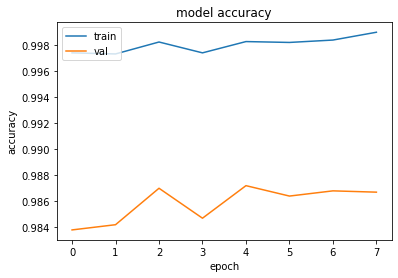

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

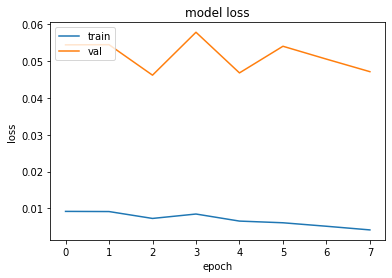

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Calculating the score

In [31]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.0471 - accuracy: 0.9867
0.9866999983787537


In [45]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in y_prob]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [46]:
conf_mat = confusion_matrix(y_test, Y_pred_labels)

Text(0.5, 42.0, 'Predicted Labels')

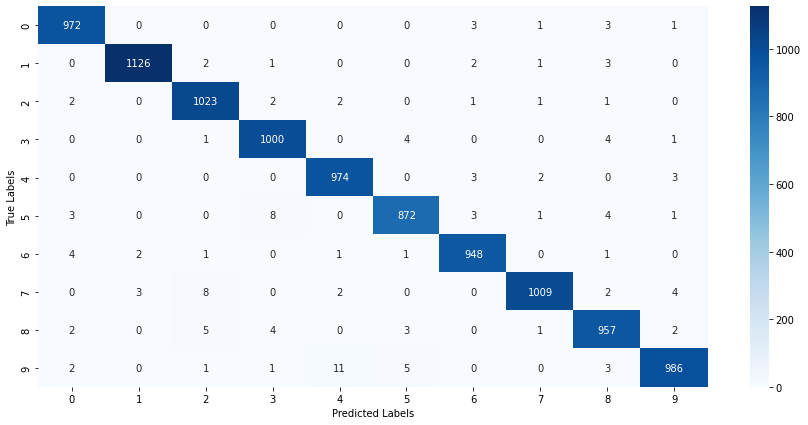

In [47]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

## Testing the model

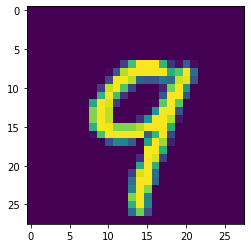

In [50]:
import matplotlib.pyplot as plt
plt.imshow(x_test[12])

In [51]:
#model.predict(X_test[2000].reshape(1,28,28)).argmax(axis=1)
img = x_test[12]
img = np.expand_dims(img,axis=0)
np.argmax(model.predict(img))

1/1 [==============================] - 0s 18ms/step


9

In [52]:
#save the above model
from keras.models import load_model
model.save("full_mnist_model.h5")

# Connecting to google drive

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import cv2

In [57]:
import keras
from keras import models    
model = models.load_model('/content/drive/MyDrive/Colab Notebooks/DevSprintDigitRecognition/full_mnist_model.h5')

# Build a calling function from ANVIL

In [58]:
@anvil.server.callable
def model_run(path):
    with anvil.media.TempFile(path) as filename:
        input_image = cv2.imread(filename)
        cv2_imshow(input_image)
        grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        input_image_resize = cv2.resize(grayscale, (28,28))
        input_image_resize = input_image_resize/255
        image_reshaped = np.reshape(input_image_resize, [1,28,28])
        input_prediction = model.predict(image_reshaped)
        input_pred_label = np.argmax(input_prediction)
        return ('Predicted Digit is: {}'.format(input_pred_label))

In [59]:
# link of app :- https://WB4ST6LJKTYGEF4U.anvil.app/XX6Z3IYNPIKLEVNPYJIU2WQX